<a href="https://colab.research.google.com/github/Rahad31/Different-VAE-for-KL-FedDis/blob/main/VAE_KL_fedDis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


\begin{array}{|c|c|c|}
\hline
\textbf{$\beta$ Value} & \textbf{250 Epochs} & \textbf{500 Epochs} \\
\hline
0.5   & 60.64 & XX.XX \\
1.0   & 59.80 & XX.XX \\
2.0   & 60.72 & XX.XX \\
4.0   & 59.75 & 59.44 \\
5.0   & XX.XX & XX.XX \\
10.0  & XX.XX & XX.XX \\
\hline
\end{array}
'''




In [1]:
import re

# Your provided text
log = """
Epoch [1/10], Training Loss: 2.305, Validation Accuracy: 9.63%
Epoch [2/10], Training Loss: 2.304, Validation Accuracy: 9.66%
Epoch [3/10], Training Loss: 2.304, Validation Accuracy: 9.69%
Epoch [4/10], Training Loss: 2.303, Validation Accuracy: 10.19%
Epoch [5/10], Training Loss: 2.302, Validation Accuracy: 11.12%
Epoch [6/10], Training Loss: 2.302, Validation Accuracy: 11.40%
Epoch [7/10], Training Loss: 2.301, Validation Accuracy: 10.76%
Epoch [8/10], Training Loss: 2.300, Validation Accuracy: 10.69%
Epoch [9/10], Training Loss: 2.300, Validation Accuracy: 10.68%
Epoch [10/10], Training Loss: 2.299, Validation Accuracy: 11.00%
Epoch [1/10], Training Loss: 2.299, Validation Accuracy: 11.74%
Epoch [2/10], Training Loss: 2.298, Validation Accuracy: 12.52%
Epoch [3/10], Training Loss: 2.297, Validation Accuracy: 13.22%
Epoch [4/10], Training Loss: 2.296, Validation Accuracy: 13.65%
Epoch [5/10], Training Loss: 2.294, Validation Accuracy: 14.30%
Epoch [6/10], Training Loss: 2.292, Validation Accuracy: 15.85%
Epoch [7/10], Training Loss: 2.289, Validation Accuracy: 17.31%
Epoch [8/10], Training Loss: 2.285, Validation Accuracy: 18.05%
Epoch [9/10], Training Loss: 2.278, Validation Accuracy: 18.26%
Epoch [10/10], Training Loss: 2.268, Validation Accuracy: 17.39%
Epoch [1/10], Training Loss: 2.252, Validation Accuracy: 16.45%
Epoch [2/10], Training Loss: 2.229, Validation Accuracy: 16.84%
Epoch [3/10], Training Loss: 2.204, Validation Accuracy: 19.25%
Epoch [4/10], Training Loss: 2.176, Validation Accuracy: 21.64%
Epoch [5/10], Training Loss: 2.146, Validation Accuracy: 23.23%
Epoch [6/10], Training Loss: 2.115, Validation Accuracy: 24.31%
Epoch [7/10], Training Loss: 2.082, Validation Accuracy: 25.09%
Epoch [8/10], Training Loss: 2.054, Validation Accuracy: 25.59%
Epoch [9/10], Training Loss: 2.031, Validation Accuracy: 25.78%
Epoch [10/10], Training Loss: 2.016, Validation Accuracy: 26.16%
Epoch [1/10], Training Loss: 2.007, Validation Accuracy: 26.27%
Epoch [2/10], Training Loss: 1.992, Validation Accuracy: 26.63%
Epoch [3/10], Training Loss: 1.976, Validation Accuracy: 27.07%
Epoch [4/10], Training Loss: 1.960, Validation Accuracy: 27.75%
Epoch [5/10], Training Loss: 1.944, Validation Accuracy: 28.84%
Epoch [6/10], Training Loss: 1.928, Validation Accuracy: 28.43%
Epoch [7/10], Training Loss: 1.915, Validation Accuracy: 29.44%
Epoch [8/10], Training Loss: 1.901, Validation Accuracy: 29.90%
Epoch [9/10], Training Loss: 1.881, Validation Accuracy: 30.40%
Epoch [10/10], Training Loss: 1.864, Validation Accuracy: 30.64%
Epoch [1/10], Training Loss: 1.871, Validation Accuracy: 31.51%
Epoch [2/10], Training Loss: 1.853, Validation Accuracy: 31.88%
Epoch [3/10], Training Loss: 1.833, Validation Accuracy: 32.28%
Epoch [4/10], Training Loss: 1.812, Validation Accuracy: 32.94%
Epoch [5/10], Training Loss: 1.796, Validation Accuracy: 33.84%
Epoch [6/10], Training Loss: 1.778, Validation Accuracy: 34.84%
Epoch [7/10], Training Loss: 1.764, Validation Accuracy: 34.60%
Epoch [8/10], Training Loss: 1.745, Validation Accuracy: 35.94%
Epoch [9/10], Training Loss: 1.726, Validation Accuracy: 36.70%
Epoch [10/10], Training Loss: 1.719, Validation Accuracy: 36.62%
Epoch [1/10], Training Loss: 1.714, Validation Accuracy: 37.47%
Epoch [2/10], Training Loss: 1.699, Validation Accuracy: 38.22%
Epoch [3/10], Training Loss: 1.681, Validation Accuracy: 38.35%
Epoch [4/10], Training Loss: 1.667, Validation Accuracy: 39.17%
Epoch [5/10], Training Loss: 1.655, Validation Accuracy: 38.67%
Epoch [6/10], Training Loss: 1.642, Validation Accuracy: 39.55%
Epoch [7/10], Training Loss: 1.629, Validation Accuracy: 40.48%
Epoch [8/10], Training Loss: 1.619, Validation Accuracy: 40.77%
Epoch [9/10], Training Loss: 1.614, Validation Accuracy: 40.87%
Epoch [10/10], Training Loss: 1.600, Validation Accuracy: 41.27%
Epoch [1/10], Training Loss: 1.619, Validation Accuracy: 41.56%
Epoch [2/10], Training Loss: 1.602, Validation Accuracy: 42.02%
Epoch [3/10], Training Loss: 1.591, Validation Accuracy: 41.81%
Epoch [4/10], Training Loss: 1.576, Validation Accuracy: 42.90%
Epoch [5/10], Training Loss: 1.563, Validation Accuracy: 43.02%
Epoch [6/10], Training Loss: 1.555, Validation Accuracy: 43.35%
Epoch [7/10], Training Loss: 1.541, Validation Accuracy: 42.59%
Epoch [8/10], Training Loss: 1.536, Validation Accuracy: 43.45%
Epoch [9/10], Training Loss: 1.522, Validation Accuracy: 43.91%
Epoch [10/10], Training Loss: 1.519, Validation Accuracy: 44.28%
Epoch [1/10], Training Loss: 1.547, Validation Accuracy: 44.05%
Epoch [2/10], Training Loss: 1.525, Validation Accuracy: 44.53%
Epoch [3/10], Training Loss: 1.517, Validation Accuracy: 44.85%
Epoch [4/10], Training Loss: 1.503, Validation Accuracy: 45.12%
Epoch [5/10], Training Loss: 1.493, Validation Accuracy: 45.36%
Epoch [6/10], Training Loss: 1.484, Validation Accuracy: 45.48%
Epoch [7/10], Training Loss: 1.475, Validation Accuracy: 45.85%
Epoch [8/10], Training Loss: 1.469, Validation Accuracy: 45.68%
Epoch [9/10], Training Loss: 1.455, Validation Accuracy: 46.20%
Epoch [10/10], Training Loss: 1.445, Validation Accuracy: 46.48%
Epoch [1/10], Training Loss: 1.471, Validation Accuracy: 47.14%
Epoch [2/10], Training Loss: 1.454, Validation Accuracy: 47.04%
Epoch [3/10], Training Loss: 1.441, Validation Accuracy: 47.02%
Epoch [4/10], Training Loss: 1.426, Validation Accuracy: 46.96%
Epoch [5/10], Training Loss: 1.424, Validation Accuracy: 47.76%
Epoch [6/10], Training Loss: 1.408, Validation Accuracy: 48.41%
Epoch [7/10], Training Loss: 1.395, Validation Accuracy: 48.49%
Epoch [8/10], Training Loss: 1.387, Validation Accuracy: 48.51%
Epoch [9/10], Training Loss: 1.377, Validation Accuracy: 49.20%
Epoch [10/10], Training Loss: 1.369, Validation Accuracy: 49.28%
Epoch [1/10], Training Loss: 1.424, Validation Accuracy: 47.68%
Epoch [2/10], Training Loss: 1.414, Validation Accuracy: 48.86%
Epoch [3/10], Training Loss: 1.404, Validation Accuracy: 49.72%
Epoch [4/10], Training Loss: 1.390, Validation Accuracy: 49.69%
Epoch [5/10], Training Loss: 1.374, Validation Accuracy: 49.30%
Epoch [6/10], Training Loss: 1.367, Validation Accuracy: 48.83%
Epoch [7/10], Training Loss: 1.358, Validation Accuracy: 49.15%
Epoch [8/10], Training Loss: 1.347, Validation Accuracy: 49.57%
Epoch [9/10], Training Loss: 1.345, Validation Accuracy: 49.60%
Epoch [10/10], Training Loss: 1.339, Validation Accuracy: 49.96%
Epoch [1/10], Training Loss: 1.387, Validation Accuracy: 50.57%
Epoch [2/10], Training Loss: 1.370, Validation Accuracy: 49.92%
Epoch [3/10], Training Loss: 1.356, Validation Accuracy: 49.81%
Epoch [4/10], Training Loss: 1.348, Validation Accuracy: 50.64%
Epoch [5/10], Training Loss: 1.334, Validation Accuracy: 50.98%
Epoch [6/10], Training Loss: 1.324, Validation Accuracy: 51.04%
Epoch [7/10], Training Loss: 1.318, Validation Accuracy: 50.98%
Epoch [8/10], Training Loss: 1.310, Validation Accuracy: 51.50%
Epoch [9/10], Training Loss: 1.296, Validation Accuracy: 51.11%
Epoch [10/10], Training Loss: 1.292, Validation Accuracy: 51.37%
Epoch [1/10], Training Loss: 1.352, Validation Accuracy: 52.22%
Epoch [2/10], Training Loss: 1.329, Validation Accuracy: 51.62%
Epoch [3/10], Training Loss: 1.316, Validation Accuracy: 52.26%
Epoch [4/10], Training Loss: 1.302, Validation Accuracy: 52.60%
Epoch [5/10], Training Loss: 1.301, Validation Accuracy: 51.38%
Epoch [6/10], Training Loss: 1.291, Validation Accuracy: 52.28%
Epoch [7/10], Training Loss: 1.283, Validation Accuracy: 51.47%
Epoch [8/10], Training Loss: 1.270, Validation Accuracy: 52.54%
Epoch [9/10], Training Loss: 1.261, Validation Accuracy: 53.17%
Epoch [10/10], Training Loss: 1.253, Validation Accuracy: 52.44%
Epoch [1/10], Training Loss: 1.306, Validation Accuracy: 52.89%
Epoch [2/10], Training Loss: 1.286, Validation Accuracy: 52.70%
Epoch [3/10], Training Loss: 1.265, Validation Accuracy: 52.82%
Epoch [4/10], Training Loss: 1.260, Validation Accuracy: 52.95%
Epoch [5/10], Training Loss: 1.245, Validation Accuracy: 53.06%
Epoch [6/10], Training Loss: 1.238, Validation Accuracy: 53.88%
Epoch [7/10], Training Loss: 1.231, Validation Accuracy: 53.08%
Epoch [8/10], Training Loss: 1.226, Validation Accuracy: 53.11%
Epoch [9/10], Training Loss: 1.214, Validation Accuracy: 53.52%
Epoch [10/10], Training Loss: 1.199, Validation Accuracy: 53.55%
Epoch [1/10], Training Loss: 1.270, Validation Accuracy: 54.10%
Epoch [2/10], Training Loss: 1.249, Validation Accuracy: 54.32%
Epoch [3/10], Training Loss: 1.227, Validation Accuracy: 54.47%
Epoch [4/10], Training Loss: 1.216, Validation Accuracy: 54.26%
Epoch [5/10], Training Loss: 1.201, Validation Accuracy: 53.64%
Epoch [6/10], Training Loss: 1.193, Validation Accuracy: 53.85%
Epoch [7/10], Training Loss: 1.185, Validation Accuracy: 54.23%
Epoch [8/10], Training Loss: 1.178, Validation Accuracy: 54.66%
Epoch [9/10], Training Loss: 1.167, Validation Accuracy: 54.71%
Epoch [10/10], Training Loss: 1.167, Validation Accuracy: 53.92%
Epoch [1/10], Training Loss: 1.265, Validation Accuracy: 54.87%
Epoch [2/10], Training Loss: 1.237, Validation Accuracy: 55.42%
Epoch [3/10], Training Loss: 1.218, Validation Accuracy: 55.15%
Epoch [4/10], Training Loss: 1.200, Validation Accuracy: 54.94%
Epoch [5/10], Training Loss: 1.193, Validation Accuracy: 54.31%
Epoch [6/10], Training Loss: 1.182, Validation Accuracy: 54.05%
Epoch [7/10], Training Loss: 1.169, Validation Accuracy: 55.19%
Epoch [8/10], Training Loss: 1.164, Validation Accuracy: 55.08%
Epoch [9/10], Training Loss: 1.151, Validation Accuracy: 54.98%
Epoch [10/10], Training Loss: 1.141, Validation Accuracy: 54.77%
Epoch [1/10], Training Loss: 1.236, Validation Accuracy: 55.19%
Epoch [2/10], Training Loss: 1.205, Validation Accuracy: 55.97%
Epoch [3/10], Training Loss: 1.193, Validation Accuracy: 55.56%
Epoch [4/10], Training Loss: 1.176, Validation Accuracy: 55.35%
Epoch [5/10], Training Loss: 1.170, Validation Accuracy: 56.03%
Epoch [6/10], Training Loss: 1.166, Validation Accuracy: 56.10%
Epoch [7/10], Training Loss: 1.145, Validation Accuracy: 55.79%
Epoch [8/10], Training Loss: 1.133, Validation Accuracy: 56.44%
Epoch [9/10], Training Loss: 1.125, Validation Accuracy: 56.29%
Epoch [10/10], Training Loss: 1.115, Validation Accuracy: 56.14%
Epoch [1/10], Training Loss: 1.209, Validation Accuracy: 56.26%
Epoch [2/10], Training Loss: 1.179, Validation Accuracy: 56.83%
Epoch [3/10], Training Loss: 1.165, Validation Accuracy: 56.91%
Epoch [4/10], Training Loss: 1.143, Validation Accuracy: 56.31%
Epoch [5/10], Training Loss: 1.135, Validation Accuracy: 56.39%
Epoch [6/10], Training Loss: 1.123, Validation Accuracy: 56.64%
Epoch [7/10], Training Loss: 1.111, Validation Accuracy: 56.13%
Epoch [8/10], Training Loss: 1.104, Validation Accuracy: 57.17%
Epoch [9/10], Training Loss: 1.095, Validation Accuracy: 57.58%
Epoch [10/10], Training Loss: 1.077, Validation Accuracy: 56.82%
Epoch [1/10], Training Loss: 1.180, Validation Accuracy: 56.50%
Epoch [2/10], Training Loss: 1.151, Validation Accuracy: 57.32%
Epoch [3/10], Training Loss: 1.130, Validation Accuracy: 56.65%
Epoch [4/10], Training Loss: 1.115, Validation Accuracy: 57.97%
Epoch [5/10], Training Loss: 1.096, Validation Accuracy: 57.74%
Epoch [6/10], Training Loss: 1.081, Validation Accuracy: 57.36%
Epoch [7/10], Training Loss: 1.067, Validation Accuracy: 57.16%
Epoch [8/10], Training Loss: 1.064, Validation Accuracy: 56.92%
Epoch [9/10], Training Loss: 1.054, Validation Accuracy: 57.49%
Epoch [10/10], Training Loss: 1.034, Validation Accuracy: 57.36%
Epoch [1/10], Training Loss: 1.152, Validation Accuracy: 57.54%
Epoch [2/10], Training Loss: 1.112, Validation Accuracy: 57.71%
Epoch [3/10], Training Loss: 1.096, Validation Accuracy: 57.74%
Epoch [4/10], Training Loss: 1.080, Validation Accuracy: 56.89%
Epoch [5/10], Training Loss: 1.069, Validation Accuracy: 57.55%
Epoch [6/10], Training Loss: 1.058, Validation Accuracy: 56.67%
Epoch [7/10], Training Loss: 1.047, Validation Accuracy: 57.44%
Epoch [8/10], Training Loss: 1.031, Validation Accuracy: 57.99%
Epoch [9/10], Training Loss: 1.021, Validation Accuracy: 56.30%
Epoch [10/10], Training Loss: 1.024, Validation Accuracy: 57.02%
Epoch [1/10], Training Loss: 1.144, Validation Accuracy: 57.85%
Epoch [2/10], Training Loss: 1.109, Validation Accuracy: 57.98%
Epoch [3/10], Training Loss: 1.086, Validation Accuracy: 57.55%
Epoch [4/10], Training Loss: 1.074, Validation Accuracy: 57.84%
Epoch [5/10], Training Loss: 1.057, Validation Accuracy: 58.23%
Epoch [6/10], Training Loss: 1.038, Validation Accuracy: 57.45%
Epoch [7/10], Training Loss: 1.024, Validation Accuracy: 57.70%
Epoch [8/10], Training Loss: 1.024, Validation Accuracy: 57.53%
Epoch [9/10], Training Loss: 1.007, Validation Accuracy: 58.01%
Epoch [10/10], Training Loss: 0.989, Validation Accuracy: 57.95%
Epoch [1/10], Training Loss: 1.125, Validation Accuracy: 58.72%
Epoch [2/10], Training Loss: 1.102, Validation Accuracy: 56.74%
Epoch [3/10], Training Loss: 1.069, Validation Accuracy: 58.37%
Epoch [4/10], Training Loss: 1.050, Validation Accuracy: 59.35%
Epoch [5/10], Training Loss: 1.035, Validation Accuracy: 59.06%
Epoch [6/10], Training Loss: 1.019, Validation Accuracy: 59.14%
Epoch [7/10], Training Loss: 1.008, Validation Accuracy: 58.88%
Epoch [8/10], Training Loss: 0.998, Validation Accuracy: 58.79%
Epoch [9/10], Training Loss: 0.993, Validation Accuracy: 59.26%
Epoch [10/10], Training Loss: 0.989, Validation Accuracy: 59.19%
Epoch [1/10], Training Loss: 1.103, Validation Accuracy: 59.60%
Epoch [2/10], Training Loss: 1.063, Validation Accuracy: 58.29%
Epoch [3/10], Training Loss: 1.043, Validation Accuracy: 59.57%
Epoch [4/10], Training Loss: 1.031, Validation Accuracy: 59.70%
Epoch [5/10], Training Loss: 1.009, Validation Accuracy: 59.41%
Epoch [6/10], Training Loss: 1.004, Validation Accuracy: 59.10%
Epoch [7/10], Training Loss: 0.988, Validation Accuracy: 59.12%
Epoch [8/10], Training Loss: 0.974, Validation Accuracy: 58.96%
Epoch [9/10], Training Loss: 0.962, Validation Accuracy: 59.23%
Epoch [10/10], Training Loss: 0.949, Validation Accuracy: 59.34%
Epoch [1/10], Training Loss: 1.081, Validation Accuracy: 59.63%
Epoch [2/10], Training Loss: 1.035, Validation Accuracy: 59.91%
Epoch [3/10], Training Loss: 1.014, Validation Accuracy: 59.62%
Epoch [4/10], Training Loss: 1.003, Validation Accuracy: 59.90%
Epoch [5/10], Training Loss: 0.980, Validation Accuracy: 59.65%
Epoch [6/10], Training Loss: 0.966, Validation Accuracy: 59.85%
Epoch [7/10], Training Loss: 0.962, Validation Accuracy: 60.03%
Epoch [8/10], Training Loss: 0.934, Validation Accuracy: 59.32%
Epoch [9/10], Training Loss: 0.927, Validation Accuracy: 58.07%
Epoch [10/10], Training Loss: 0.922, Validation Accuracy: 60.05%
Epoch [1/10], Training Loss: 1.061, Validation Accuracy: 59.57%
Epoch [2/10], Training Loss: 1.026, Validation Accuracy: 59.29%
Epoch [3/10], Training Loss: 1.009, Validation Accuracy: 58.36%
Epoch [4/10], Training Loss: 0.990, Validation Accuracy: 58.99%
Epoch [5/10], Training Loss: 0.969, Validation Accuracy: 59.26%
Epoch [6/10], Training Loss: 0.955, Validation Accuracy: 59.16%
Epoch [7/10], Training Loss: 0.930, Validation Accuracy: 59.53%
Epoch [8/10], Training Loss: 0.924, Validation Accuracy: 58.83%
Epoch [9/10], Training Loss: 0.915, Validation Accuracy: 59.74%
Epoch [10/10], Training Loss: 0.892, Validation Accuracy: 59.46%
Epoch [1/10], Training Loss: 1.050, Validation Accuracy: 59.15%
Epoch [2/10], Training Loss: 1.013, Validation Accuracy: 60.10%
Epoch [3/10], Training Loss: 0.993, Validation Accuracy: 59.63%
Epoch [4/10], Training Loss: 0.971, Validation Accuracy: 59.76%
Epoch [5/10], Training Loss: 0.939, Validation Accuracy: 60.48%
Epoch [6/10], Training Loss: 0.928, Validation Accuracy: 60.01%
Epoch [7/10], Training Loss: 0.918, Validation Accuracy: 59.58%
Epoch [8/10], Training Loss: 0.899, Validation Accuracy: 60.22%
Epoch [9/10], Training Loss: 0.883, Validation Accuracy: 59.97%
Epoch [10/10], Training Loss: 0.868, Validation Accuracy: 60.22%
"""

# Regular expression to find validation accuracies
accuracies = re.findall(r'Validation Accuracy: (\d+\.\d+)%', log)

# Convert accuracies from string to float
accuracies = [float(acc) for acc in accuracies]

# Print accuracies
print("Accuracies:", accuracies)

# Print size of the array
print("Size of array:", len(accuracies))


Accuracies: [9.63, 9.66, 9.69, 10.19, 11.12, 11.4, 10.76, 10.69, 10.68, 11.0, 11.74, 12.52, 13.22, 13.65, 14.3, 15.85, 17.31, 18.05, 18.26, 17.39, 16.45, 16.84, 19.25, 21.64, 23.23, 24.31, 25.09, 25.59, 25.78, 26.16, 26.27, 26.63, 27.07, 27.75, 28.84, 28.43, 29.44, 29.9, 30.4, 30.64, 31.51, 31.88, 32.28, 32.94, 33.84, 34.84, 34.6, 35.94, 36.7, 36.62, 37.47, 38.22, 38.35, 39.17, 38.67, 39.55, 40.48, 40.77, 40.87, 41.27, 41.56, 42.02, 41.81, 42.9, 43.02, 43.35, 42.59, 43.45, 43.91, 44.28, 44.05, 44.53, 44.85, 45.12, 45.36, 45.48, 45.85, 45.68, 46.2, 46.48, 47.14, 47.04, 47.02, 46.96, 47.76, 48.41, 48.49, 48.51, 49.2, 49.28, 47.68, 48.86, 49.72, 49.69, 49.3, 48.83, 49.15, 49.57, 49.6, 49.96, 50.57, 49.92, 49.81, 50.64, 50.98, 51.04, 50.98, 51.5, 51.11, 51.37, 52.22, 51.62, 52.26, 52.6, 51.38, 52.28, 51.47, 52.54, 53.17, 52.44, 52.89, 52.7, 52.82, 52.95, 53.06, 53.88, 53.08, 53.11, 53.52, 53.55, 54.1, 54.32, 54.47, 54.26, 53.64, 53.85, 54.23, 54.66, 54.71, 53.92, 54.87, 55.42, 55.15, 54.94

Array for 250 BVAe

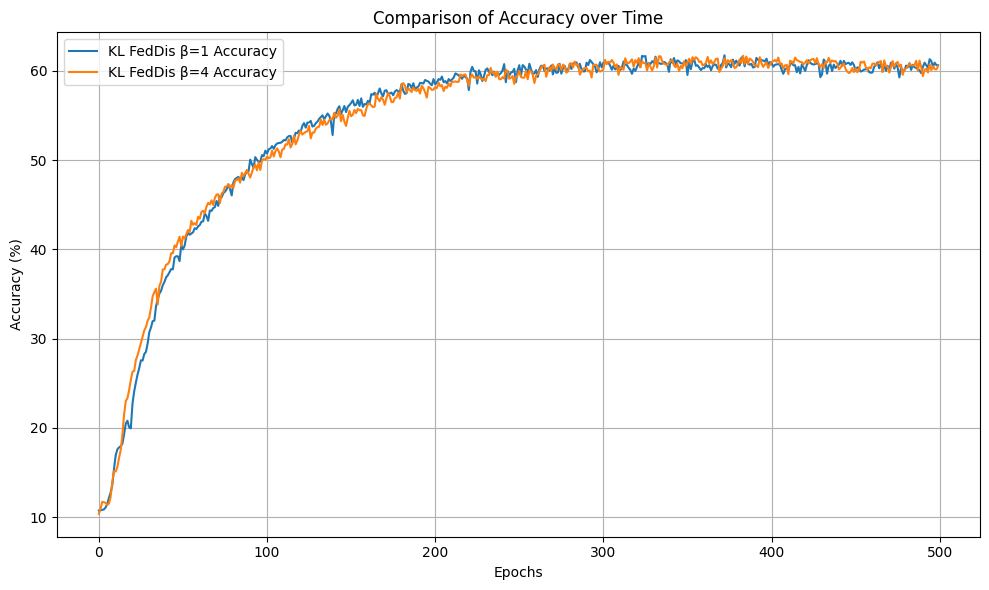

In [ ]:
import matplotlib.pyplot as plt

# Data
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
KL_FedDisb1_accuracy = [10.74, 10.77, 10.82, 10.87, 11.09, 11.48, 12.17, 12.77, 13.61, 15.41, 16.92, 17.6, 17.82, 17.94, 18.24, 19.27, 20.48, 20.81, 20.07, 19.95, 22.72, 24.09, 25.08, 25.99, 26.7, 27.58, 27.55, 28.28, 28.53, 29.46, 30.73, 31.26, 31.97, 32.02, 33.65, 34.38, 35.06, 35.36, 35.99, 36.36, 36.88, 37.11, 37.46, 37.8, 37.77, 39.1, 39.24, 39.23, 38.69, 40.55, 40.01, 40.42, 41.45, 41.83, 41.65, 41.78, 41.92, 42.38, 42.29, 42.59, 42.73, 43.11, 43.15, 44.05, 43.73, 43.21, 44.37, 44.32, 44.64, 44.74, 45.43, 44.88, 45.95, 45.84, 46.32, 46.47, 46.75, 47.31, 46.76, 46.05, 47.52, 47.89, 48.02, 48.14, 47.76, 48.11, 47.77, 48.39, 48.78, 48.74, 50.06, 49.58, 49.14, 50.35, 50.05, 49.82, 49.83, 50.57, 50.45, 51.07, 50.75, 51.21, 51.32, 51.58, 51.28, 51.69, 51.87, 51.93, 51.95, 52.06, 52.27, 52.21, 52.57, 52.7, 52.72, 51.99, 52.42, 53.07, 53.03, 53.33, 53.17, 53.85, 54.16, 53.65, 54.21, 54.23, 54.4, 53.77, 53.85, 54.15, 54.33, 54.64, 54.84, 55.03, 54.59, 54.9, 55.23, 54.99, 54.32, 52.82, 55.25, 55.23, 55.76, 56.05, 55.19, 55.6, 56.07, 55.39, 55.98, 56.18, 56.41, 56.72, 56.13, 56.22, 56.76, 56.08, 56.93, 55.98, 56.29, 56.25, 56.65, 56.43, 57.41, 57.34, 57.57, 56.99, 57.53, 58.04, 57.47, 57.17, 57.79, 57.84, 57.42, 57.49, 57.58, 57.28, 57.68, 57.86, 57.72, 57.65, 58.53, 57.78, 57.43, 57.52, 58.55, 58.46, 58.06, 58.62, 57.96, 58.16, 58.25, 58.66, 58.65, 58.59, 58.99, 58.89, 58.81, 58.57, 58.4, 59.09, 58.51, 58.73, 59.09, 59.01, 59.37, 58.73, 58.87, 58.6, 59.09, 58.88, 59.05, 59.26, 59.73, 59.63, 59.5, 59.3, 59.13, 59.55, 59.3, 59.17, 57.86, 59.94, 60.46, 59.98, 59.97, 58.59, 60.08, 59.65, 58.87, 59.4, 60.13, 60.29, 59.87, 59.89, 59.52, 59.93, 59.4, 59.78, 59.57, 59.75, 60.06, 60.77, 58.74, 60.0, 59.45, 59.82, 59.89, 60.24, 58.74, 60.05, 60.65, 59.48, 60.66, 60.49, 60.15, 59.78, 60.81, 60.17, 59.67, 59.72, 60.1, 59.33, 60.21, 60.58, 60.55, 60.01, 60.28, 60.28, 60.04, 60.62, 59.61, 60.36, 59.79, 59.84, 60.8, 59.7, 60.3, 60.58, 59.99, 60.18, 60.72, 60.22, 60.84, 60.93, 60.96, 60.4, 60.81, 60.18, 59.95, 59.96, 60.93, 60.66, 61.23, 60.99, 60.76, 60.52, 59.85, 60.23, 60.98, 60.4, 60.93, 60.87, 60.9, 60.94, 60.6, 60.14, 60.57, 60.17, 60.28, 60.57, 60.08, 60.35, 61.06, 60.69, 60.67, 60.36, 60.12, 59.68, 60.26, 60.01, 60.46, 60.92, 60.43, 61.69, 61.62, 61.67, 60.4, 60.88, 60.78, 61.09, 60.92, 61.6, 60.96, 60.9, 60.8, 60.81, 61.02, 60.9, 60.72, 59.9, 61.31, 60.92, 61.45, 60.76, 61.19, 61.08, 60.86, 60.85, 60.77, 61.22, 59.55, 60.98, 60.2, 61.08, 61.29, 60.58, 60.64, 60.36, 60.1, 60.32, 60.32, 60.71, 60.45, 60.64, 60.08, 60.54, 60.74, 60.69, 60.26, 60.2, 60.67, 60.91, 61.76, 60.39, 60.81, 60.74, 60.42, 61.27, 60.79, 61.16, 60.81, 60.6, 61.47, 61.6, 60.52, 61.49, 60.82, 60.7, 60.8, 60.39, 60.45, 61.47, 61.23, 61.31, 61.24, 61.16, 61.06, 61.38, 60.71, 61.0, 60.88, 60.48, 60.69, 60.73, 60.77, 60.7, 60.14, 59.68, 60.21, 60.28, 60.29, 60.65, 61.05, 60.63, 60.65, 59.86, 60.46, 59.72, 60.73, 60.39, 60.01, 60.68, 61.2, 60.92, 60.78, 60.72, 60.78, 60.86, 60.8, 59.31, 59.61, 61.28, 61.0, 59.7, 60.59, 60.78, 59.99, 60.71, 60.34, 60.51, 60.7, 61.14, 60.57, 61.13, 60.76, 60.88, 60.91, 60.68, 60.97, 60.65, 60.05, 60.4, 60.33, 59.93, 60.02, 60.15, 60.19, 60.29, 59.87, 59.8, 59.83, 60.46, 60.67, 60.98, 60.3, 60.88, 59.96, 60.73, 60.02, 60.58, 60.11, 60.93, 60.88, 60.26, 60.77, 60.38, 59.27, 60.32, 60.05, 60.04, 60.6, 60.4, 60.87, 60.12, 60.69, 60.42, 60.34, 60.22, 60.05, 59.76, 60.46, 60.93, 60.64, 60.35, 61.32, 61.11, 60.46, 60.93, 60.66, 60.64]
KL_FedDisb4_accuracy =  [10.38, 10.94, 11.72, 11.68, 11.6, 11.38, 11.52, 12.27, 13.94, 15.19, 15.12, 15.61, 16.64, 17.53, 19.21, 21.53, 23.01, 23.34, 24.25, 25.36, 26.3, 26.39, 27.61, 28.12, 28.83, 29.58, 30.28, 30.92, 31.31, 32.0, 32.39, 33.49, 34.76, 35.22, 35.6, 33.84, 35.93, 36.39, 37.76, 37.77, 38.29, 38.36, 38.67, 39.58, 39.57, 40.46, 40.25, 40.88, 41.43, 40.36, 41.45, 41.22, 41.71, 42.18, 41.95, 43.21, 42.77, 42.95, 42.75, 43.66, 43.44, 44.21, 44.34, 44.06, 44.8, 45.22, 45.04, 45.5, 44.99, 45.8, 46.15, 46.18, 45.19, 46.26, 46.43, 47.02, 47.07, 47.26, 46.92, 47.22, 46.9, 47.72, 47.77, 47.99, 47.48, 48.58, 48.21, 48.54, 48.91, 48.47, 48.06, 48.63, 49.2, 49.5, 48.86, 49.76, 48.91, 49.95, 50.12, 50.05, 50.41, 50.23, 50.32, 51.08, 50.42, 50.99, 51.32, 50.97, 50.33, 51.19, 51.26, 51.78, 51.75, 52.36, 51.42, 51.81, 52.76, 51.78, 52.2, 52.87, 53.29, 52.87, 53.04, 53.18, 53.23, 53.85, 52.45, 53.09, 53.1, 53.54, 53.7, 53.76, 54.55, 53.95, 54.54, 53.97, 54.12, 54.48, 54.68, 54.6, 55.29, 54.75, 55.0, 55.7, 54.37, 55.07, 54.31, 53.84, 54.76, 55.53, 54.93, 55.09, 55.64, 55.28, 55.76, 55.59, 55.62, 55.04, 54.95, 55.78, 56.27, 56.36, 56.14, 55.94, 56.01, 57.43, 56.87, 56.61, 57.07, 56.76, 56.21, 56.95, 57.53, 57.13, 56.51, 56.51, 56.96, 57.04, 57.59, 56.91, 58.49, 58.64, 58.37, 57.6, 58.06, 57.85, 57.64, 58.14, 57.86, 57.76, 58.04, 57.47, 58.35, 58.07, 57.62, 57.01, 58.23, 58.1, 57.88, 57.91, 58.2, 58.08, 58.71, 58.28, 58.42, 57.75, 58.23, 58.11, 58.6, 58.27, 58.83, 58.78, 58.83, 58.77, 58.79, 59.62, 59.44, 59.57, 59.61, 58.96, 58.33, 59.36, 59.59, 59.25, 59.34, 59.11, 59.38, 59.17, 59.02, 59.14, 58.87, 59.53, 59.54, 60.34, 59.75, 59.86, 59.35, 59.92, 59.09, 59.07, 59.31, 59.15, 60.16, 59.93, 59.13, 59.23, 59.43, 58.55, 59.34, 59.54, 60.01, 59.32, 59.24, 59.25, 60.02, 59.07, 60.05, 59.95, 59.56, 58.65, 59.49, 59.63, 59.94, 60.4, 60.58, 60.69, 59.35, 60.01, 60.45, 60.03, 60.72, 60.33, 60.19, 60.75, 60.68, 60.13, 60.72, 60.43, 59.81, 59.95, 60.85, 60.84, 60.4, 61.05, 60.64, 60.71, 59.59, 59.95, 60.26, 60.29, 60.35, 59.95, 60.04, 59.27, 60.65, 60.69, 60.7, 60.2, 59.93, 60.01, 60.2, 61.24, 60.77, 61.03, 60.95, 61.22, 60.94, 60.43, 60.74, 59.56, 60.43, 60.32, 60.14, 61.42, 60.9, 60.88, 61.04, 61.31, 60.47, 61.22, 60.92, 61.44, 60.41, 61.08, 60.89, 60.89, 60.06, 60.81, 60.49, 60.05, 60.51, 61.49, 60.38, 61.64, 61.64, 61.07, 60.82, 60.75, 60.64, 60.95, 61.12, 61.27, 60.61, 60.42, 60.82, 59.99, 60.57, 60.3, 61.07, 60.54, 60.96, 61.37, 60.8, 61.54, 61.26, 61.54, 61.38, 61.0, 61.08, 60.62, 60.73, 60.89, 61.57, 60.83, 61.18, 60.77, 61.02, 61.36, 61.39, 59.89, 60.25, 60.56, 61.43, 60.62, 61.22, 60.97, 61.21, 60.95, 60.34, 60.41, 60.8, 61.29, 60.89, 61.71, 60.79, 61.62, 60.79, 61.4, 61.25, 61.04, 60.59, 60.63, 60.42, 61.55, 60.88, 60.46, 60.73, 60.95, 60.34, 60.7, 61.02, 61.09, 61.23, 61.02, 61.5, 60.77, 60.84, 60.28, 60.62, 60.68, 59.64, 61.15, 61.02, 60.84, 61.5, 61.22, 61.13, 61.01, 60.99, 60.74, 60.96, 61.2, 60.83, 61.19, 61.31, 61.34, 60.91, 61.43, 60.69, 60.44, 60.76, 60.33, 61.01, 60.98, 61.47, 60.92, 61.18, 61.06, 61.12, 60.86, 60.19, 60.35, 60.7, 60.82, 60.22, 59.95, 59.76, 59.91, 60.32, 59.88, 60.29, 59.86, 60.12, 61.04, 60.94, 61.07, 60.45, 60.12, 60.4, 60.3, 60.81, 60.84, 60.63, 60.83, 61.01, 61.11, 59.88, 61.19, 60.51, 60.53, 59.82, 60.44, 61.11, 60.49, 60.87, 61.01, 60.51, 60.7, 59.57, 60.21, 60.28, 60.49, 60.83, 60.64, 60.62, 60.64, 61.14, 60.02, 61.16, 60.43, 59.42, 60.14, 60.24, 59.83, 60.75, 60.1, 60.51, 60.2, 60.17, 60.54]




# Plotting
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')

plt.plot(KL_FedDisb4_accuracy, label='KL FedDis β=4 Accuracy')



# Adding titles and labels
plt.title('Comparison of Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# Adding legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


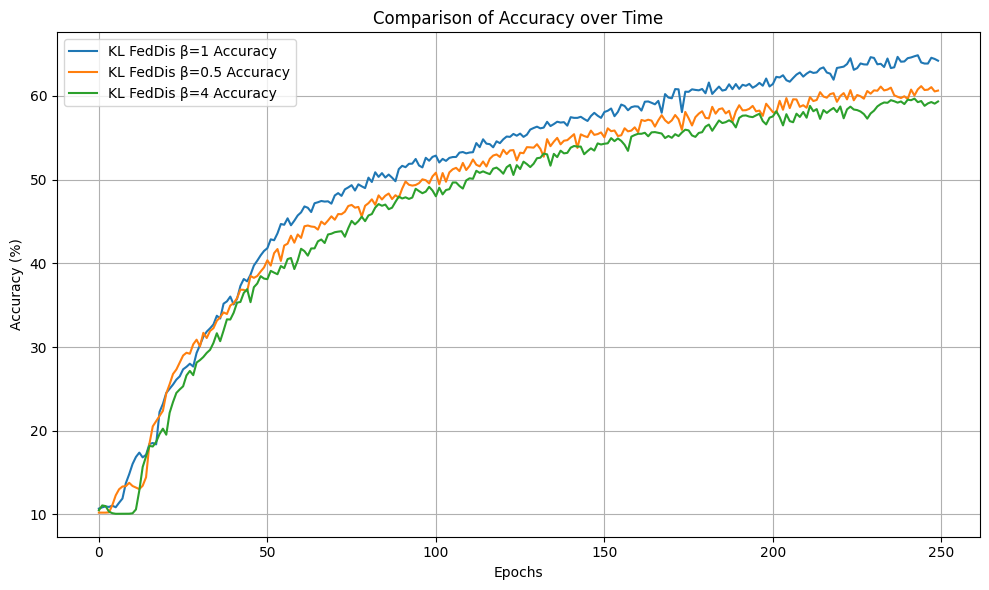

In [ ]:
import matplotlib.pyplot as plt

# Data
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
# KL_FedDisb4_accuracy = []
KL_FedDisb2_accuracy = [9.63, 9.66, 9.69, 10.19, 11.12, 11.4, 10.76, 10.69, 10.68, 11.0, 11.74, 12.52, 13.22, 13.65, 14.3, 15.85, 17.31, 18.05, 18.26, 17.39, 16.45, 16.84, 19.25, 21.64, 23.23, 24.31, 25.09, 25.59, 25.78, 26.16, 26.27, 26.63, 27.07, 27.75, 28.84, 28.43, 29.44, 29.9, 30.4, 30.64, 31.51, 31.88, 32.28, 32.94, 33.84, 34.84, 34.6, 35.94, 36.7, 36.62, 37.47, 38.22, 38.35, 39.17, 38.67, 39.55, 40.48, 40.77, 40.87, 41.27, 41.56, 42.02, 41.81, 42.9, 43.02, 43.35, 42.59, 43.45, 43.91, 44.28, 44.05, 44.53, 44.85, 45.12, 45.36, 45.48, 45.85, 45.68, 46.2, 46.48, 47.14, 47.04, 47.02, 46.96, 47.76, 48.41, 48.49, 48.51, 49.2, 49.28, 47.68, 48.86, 49.72, 49.69, 49.3, 48.83, 49.15, 49.57, 49.6, 49.96, 50.57, 49.92, 49.81, 50.64, 50.98, 51.04, 50.98, 51.5, 51.11, 51.37, 52.22, 51.62, 52.26, 52.6, 51.38, 52.28, 51.47, 52.54, 53.17, 52.44, 52.89, 52.7, 52.82, 52.95, 53.06, 53.88, 53.08, 53.11, 53.52, 53.55, 54.1, 54.32, 54.47, 54.26, 53.64, 53.85, 54.23, 54.66, 54.71, 53.92, 54.87, 55.42, 55.15, 54.94, 54.31, 54.05, 55.19, 55.08, 54.98, 54.77, 55.19, 55.97, 55.56, 55.35, 56.03, 56.1, 55.79, 56.44, 56.29, 56.14, 56.26, 56.83, 56.91, 56.31, 56.39, 56.64, 56.13, 57.17, 57.58, 56.82, 56.5, 57.32, 56.65, 57.97, 57.74, 57.36, 57.16, 56.92, 57.49, 57.36, 57.54, 57.71, 57.74, 56.89, 57.55, 56.67, 57.44, 57.99, 56.3, 57.02, 57.85, 57.98, 57.55, 57.84, 58.23, 57.45, 57.7, 57.53, 58.01, 57.95, 58.72, 56.74, 58.37, 59.35, 59.06, 59.14, 58.88, 58.79, 59.26, 59.19, 59.6, 58.29, 59.57, 59.7, 59.41, 59.1, 59.12, 58.96, 59.23, 59.34, 59.63, 59.91, 59.62, 59.9, 59.65, 59.85, 60.03, 59.32, 58.07, 60.05, 59.57, 59.29, 58.36, 58.99, 59.26, 59.16, 59.53, 58.83, 59.74, 59.46, 59.15, 60.1, 59.63, 59.76, 60.48, 60.01, 59.58, 60.22, 59.97, 60.22]
KL_FedDisb0_5_accuracy = [10.22, 10.22, 10.22, 10.25, 11.11, 12.28, 13.01, 13.34, 13.38, 13.78, 13.4, 13.21, 13.03, 13.43, 14.44, 18.44, 20.53, 21.15, 21.79, 22.38, 24.46, 25.56, 26.78, 27.32, 28.17, 28.99, 29.32, 29.2, 30.33, 30.88, 30.08, 31.7, 31.08, 31.93, 32.25, 33.14, 33.57, 34.14, 33.95, 34.96, 35.24, 35.84, 36.86, 36.83, 36.67, 38.49, 38.27, 38.49, 39.02, 39.51, 40.37, 39.73, 41.22, 41.71, 40.29, 42.13, 42.35, 43.3, 42.47, 43.45, 43.04, 44.43, 44.52, 44.4, 44.35, 44.03, 44.99, 44.66, 45.12, 45.62, 45.21, 45.89, 45.87, 46.16, 46.85, 46.98, 46.65, 46.74, 45.6, 46.88, 47.19, 47.65, 47.0, 48.12, 47.63, 48.08, 48.34, 47.68, 48.14, 47.84, 48.93, 49.78, 49.39, 49.29, 49.36, 49.58, 50.04, 49.93, 49.55, 50.39, 50.83, 49.44, 50.79, 49.75, 50.87, 51.24, 51.41, 51.02, 52.0, 51.15, 51.65, 52.41, 51.78, 51.59, 52.17, 51.57, 52.49, 52.88, 53.01, 52.71, 53.57, 53.05, 53.49, 53.53, 52.3, 53.22, 53.16, 53.88, 53.86, 53.82, 54.23, 53.68, 52.74, 54.84, 54.0, 54.54, 54.99, 54.22, 54.65, 54.72, 55.08, 55.43, 53.79, 55.41, 55.21, 55.08, 55.86, 55.35, 55.44, 55.64, 55.06, 56.13, 55.79, 55.87, 55.21, 55.3, 56.14, 55.77, 55.86, 56.25, 55.67, 57.13, 57.01, 57.16, 57.05, 56.34, 57.09, 57.7, 57.09, 56.75, 57.08, 57.72, 57.22, 55.95, 58.09, 57.33, 56.47, 57.46, 57.88, 58.17, 57.38, 57.32, 58.7, 57.88, 58.42, 58.52, 57.91, 58.22, 56.91, 58.15, 58.89, 58.28, 58.3, 58.46, 58.81, 58.16, 58.25, 57.62, 59.07, 58.56, 58.06, 58.0, 59.42, 58.35, 59.74, 58.55, 59.6, 59.58, 58.7, 58.89, 58.59, 59.86, 59.39, 59.52, 60.45, 59.93, 59.79, 60.22, 60.33, 59.3, 59.99, 60.34, 59.59, 60.69, 59.48, 60.11, 59.96, 59.67, 60.59, 60.27, 60.67, 60.62, 61.12, 60.66, 60.76, 60.99, 60.08, 59.9, 59.75, 59.96, 59.63, 60.76, 60.05, 60.79, 61.17, 60.71, 60.75, 61.05, 60.54, 60.64]
KL_FedDisb1_accuracy = [10.7, 10.85, 10.96, 10.9, 11.05, 10.86, 11.4, 11.9, 13.73, 14.81, 16.03, 16.87, 17.39, 16.82, 17.13, 18.42, 18.54, 18.37, 22.25, 23.2, 24.52, 25.03, 25.52, 26.11, 26.5, 27.34, 27.64, 28.01, 27.67, 29.3, 30.23, 31.23, 31.84, 32.24, 32.7, 33.74, 33.41, 35.18, 35.46, 36.03, 35.09, 35.76, 37.31, 38.13, 37.85, 38.65, 39.74, 40.32, 40.95, 41.48, 41.81, 42.87, 42.76, 43.58, 44.7, 44.61, 45.38, 44.55, 45.1, 45.72, 46.09, 46.8, 46.64, 46.13, 47.18, 47.3, 47.45, 47.38, 47.41, 47.13, 48.11, 48.39, 48.06, 48.84, 49.07, 49.34, 48.7, 49.44, 49.2, 48.99, 50.24, 49.72, 50.88, 50.33, 50.78, 50.25, 50.61, 50.24, 49.81, 51.26, 51.65, 51.49, 51.89, 51.91, 52.47, 51.69, 51.46, 52.61, 52.26, 52.72, 52.87, 52.05, 52.48, 52.24, 52.6, 52.7, 52.71, 53.23, 53.3, 53.14, 53.24, 53.28, 54.37, 53.88, 54.82, 54.3, 54.24, 53.86, 54.58, 54.36, 54.82, 55.15, 55.11, 55.46, 55.25, 55.5, 55.11, 55.37, 55.98, 56.17, 56.33, 56.13, 56.22, 56.91, 56.4, 56.64, 56.92, 56.82, 56.87, 56.45, 57.46, 57.38, 57.38, 57.51, 57.24, 57.01, 57.6, 57.98, 57.64, 57.38, 58.08, 58.23, 58.5, 57.58, 58.09, 58.97, 58.8, 58.29, 58.66, 58.76, 58.73, 58.25, 59.31, 59.34, 59.18, 59.0, 59.41, 57.99, 60.22, 59.81, 59.72, 60.82, 60.79, 58.07, 60.51, 60.49, 60.79, 60.72, 60.67, 60.83, 60.32, 61.6, 60.24, 60.69, 61.12, 60.64, 60.74, 61.39, 60.81, 61.42, 60.84, 61.33, 61.21, 61.44, 60.98, 61.21, 61.56, 61.22, 62.08, 61.13, 61.43, 62.28, 62.21, 62.47, 61.88, 61.7, 62.14, 62.55, 62.8, 62.31, 62.66, 62.92, 62.75, 62.81, 63.25, 63.41, 62.8, 62.66, 61.94, 63.34, 63.42, 63.5, 63.81, 64.5, 63.12, 63.32, 63.88, 63.77, 63.75, 64.63, 64.54, 63.78, 63.84, 63.46, 64.47, 63.33, 63.42, 64.67, 64.09, 64.12, 64.51, 64.6, 64.74, 64.86, 64.0, 63.87, 63.87, 64.56, 64.42, 64.21]
KL_FedDisb4_accuracy = [10.51, 11.08, 11.0, 10.34, 10.15, 10.08, 10.08, 10.08, 10.08, 10.09, 10.14, 10.6, 12.86, 15.67, 16.95, 18.19, 18.12, 18.67, 19.6, 20.25, 19.53, 22.15, 23.43, 24.52, 24.94, 25.31, 26.61, 27.15, 26.64, 28.15, 28.44, 28.81, 29.3, 29.67, 30.49, 31.65, 30.7, 31.97, 33.31, 33.29, 34.1, 35.3, 35.39, 36.47, 36.91, 35.36, 37.15, 37.59, 38.47, 38.18, 38.11, 39.1, 38.89, 38.7, 39.68, 39.43, 40.51, 40.64, 39.32, 40.34, 41.74, 41.46, 40.92, 41.78, 41.79, 42.63, 42.85, 42.43, 43.45, 43.54, 43.72, 43.79, 43.84, 43.18, 44.2, 45.07, 44.66, 45.04, 45.57, 45.04, 45.72, 45.89, 46.66, 47.08, 46.88, 47.02, 46.47, 46.65, 47.34, 47.98, 47.75, 47.89, 47.7, 47.86, 48.91, 48.63, 48.38, 48.57, 49.14, 48.7, 48.01, 49.04, 48.24, 48.76, 48.86, 49.66, 49.66, 49.24, 48.93, 49.91, 50.16, 50.1, 51.06, 50.81, 50.99, 50.81, 50.66, 51.31, 51.44, 51.13, 50.71, 51.48, 51.77, 50.56, 51.73, 51.27, 52.15, 51.86, 51.5, 51.9, 52.56, 52.62, 53.11, 53.02, 51.67, 53.08, 52.69, 53.46, 53.14, 53.2, 53.82, 54.02, 53.95, 53.95, 53.04, 53.41, 53.74, 53.47, 54.33, 54.2, 54.29, 54.34, 54.96, 54.6, 54.92, 54.63, 54.16, 53.44, 55.14, 55.33, 55.48, 55.48, 55.6, 55.18, 55.65, 55.68, 55.6, 55.51, 54.97, 55.22, 55.0, 55.43, 55.2, 55.63, 55.97, 55.88, 55.28, 55.11, 55.58, 55.67, 56.33, 56.58, 55.84, 56.45, 57.07, 56.76, 56.87, 57.09, 56.84, 56.24, 57.38, 57.64, 57.67, 57.53, 57.47, 57.68, 57.87, 56.99, 56.6, 57.4, 57.56, 58.17, 57.47, 56.48, 57.82, 56.99, 56.86, 57.88, 57.49, 58.08, 57.4, 58.81, 58.17, 58.43, 57.26, 58.31, 57.97, 58.3, 58.56, 58.08, 58.74, 57.33, 58.4, 58.72, 58.38, 58.31, 58.14, 57.83, 57.29, 57.91, 58.24, 58.75, 59.03, 59.22, 59.18, 59.49, 59.37, 59.2, 59.34, 59.03, 59.55, 59.49, 59.68, 59.26, 59.39, 58.82, 59.11, 59.27, 59.08, 59.34]



# Plotting
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
plt.plot(KL_FedDisb0_5_accuracy, label='KL FedDis β=0.5 Accuracy')
plt.plot(KL_FedDisb2_accuracy, label='KL FedDis β=2 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')
# plt.plot(KL_FedDisb1_accuracy, label='KL FedDis β=1 Accuracy')

plt.plot(KL_FedDisb4_accuracy, label='KL FedDis β=4 Accuracy')



# Adding titles and labels
plt.title('Comparison of Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# Adding legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
%%time
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch import nn
from typing import Dict

CPU times: user 6.62 s, sys: 763 ms, total: 7.39 s
Wall time: 10.8 s


In [ ]:
# Define VAE model
class VAE(nn.Module):
    def __init__(self, x_dim, h_dim, z_dim):
        super(VAE, self).__init__()
        self.x_dim = x_dim
        self.h_dim = h_dim
        self.z_dim = z_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 4, stride=2, padding=1),  # 16x16
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 8x8
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),  # 4x4
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Linear(256, 2*z_dim)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 2048),
            nn.ReLU(),
            nn.Unflatten(1, (128, 4, 4)),
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),  # 8x8
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1),  # 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 4, stride=2, padding=1),  # 32x32
            nn.Sigmoid()
        )

    def encode(self, x):
        h = self.encoder(x)
        mu, logvar = h[:, :self.z_dim], h[:, self.z_dim:]
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


In [ ]:
def vae_train(vae: VAE, trainloader: DataLoader, epochs: int, beta: float = 1.0) -> None:
    optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)
    for epoch in range(epochs):
        for i, data in enumerate(trainloader, 0):
            inputs, _ = data
            optimizer.zero_grad()
            recon_x, mu, logvar = vae(inputs)
            loss = vae_loss(recon_x, inputs, mu, logvar, beta=beta)
            loss.backward()
            optimizer.step()



In [ ]:

# Define classification model
class Net(nn.Module):
    def __init__(self) -> None:
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Load CIFAR10 dataset
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

full_dataset = CIFAR10(root="./data", train=True, download=True, transform=transform)
test_set = CIFAR10(root="./data", train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:03<00:00, 55.6MB/s]


In [ ]:
# Split dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(full_dataset, [train_size, val_size])


In [ ]:
# Create training and validation loaders
trainloader = DataLoader(train_set, batch_size=128, shuffle=True, num_workers=2)
valloader = DataLoader(val_set, batch_size=128, shuffle=False, num_workers=2)
testloader = DataLoader(test_set, batch_size=128, shuffle=False, num_workers=2)


In [ ]:
def vae_loss(recon_x, x, mu, logvar, beta=1):
    BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + beta * KLD


In [ ]:
# Define training procedure for classification model
def train(net: nn.Module, trainloader: DataLoader, valloader: DataLoader, epochs: int) -> None:
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    best_acc = 0.0

    for epoch in range(epochs):
        # Training loop
        net.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation loop
        net.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data in valloader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_acc = 100 * correct / total
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(net.state_dict(), 'best_model.pth')

        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss / (i+1):.3f}, Validation Accuracy: {val_acc:.2f}%")

In [ ]:
# Define evaluation procedure
def evaluate(net: nn.Module, testloader: DataLoader) -> float:
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

In [ ]:
def initialize_clients(trainset, transform, batch_size, num_clients):
    clients = {}
    for i in range(num_clients):
        client_trainset = torch.utils.data.Subset(trainset, range(i * len(trainset) // num_clients, (i + 1) * len(trainset) // num_clients))
        client_trainloader = torch.utils.data.DataLoader(client_trainset, batch_size=batch_size, shuffle=True)
        clients[f"client_{i}"] = client_trainloader
    return clients

In [ ]:
def get_distribution_info(vae: VAE) -> Dict:
    # Implement the logic to extract distribution information from the VAE
    # This can involve computing statistics, parameters, or any other relevant information
    # that can be used to generate augmented data

    # Example implementation:
    distribution_info = {
        "mean": vae.encoder[-1].bias.data.cpu().numpy(),
        "std": torch.exp(0.5 * vae.encoder[-1].weight.data).cpu().numpy()
    }

    return distribution_info

In [ ]:
def send_distribution_info(distribution_info: Dict) -> None:
    # Implement the logic to send the distribution information to the global server
    # This can involve using a network protocol, a message queue, or any other communication mechanism
    # to send the information

    # Example implementation:
    # Send the distribution information to the global server using a network protocol
    # For example, you can use the `socket` module to send the information over a network
    # or use a message queue like `RabbitMQ` to send the information
    pass


In [ ]:
# Define logic to generate augmented data using Ordinary Normal distribution
def generate_augmented_data(vae: VAE, distribution_info: Dict) -> torch.Tensor:
    # Generate augmented data using Ordinary Normal distribution
    mean = distribution_info["mean"]
    std = distribution_info["std"]
    augmented_data = torch.randn(64, vae.z_dim) * std + mean
    return augmented_data

In [ ]:
def federated_train(net: nn.Module, vae: VAE, trainloaders: Dict[str, DataLoader], trainloader: DataLoader, valloader: DataLoader, epochs: int) -> None:
    for epoch in range(epochs):
        for client_id, client_trainloader in trainloaders.items():
            # Train VAE on client data
            vae_train(vae, client_trainloader, epochs=10, beta=1)

            # Share distribution information with global server
            distribution_info = get_distribution_info(vae)
            send_distribution_info(distribution_info)

            # Receive distribution information from other clients
            other_distribution_info = receive_distribution_info()

            # Generate augmented data using received distribution information
            augmented_data = generate_augmented_data(vae, other_distribution_info)

            # Train classification model using local, augmented, and validation data
            train(net, client_trainloader, valloader, epochs=10)

            # Send model updates to global server
            send_model_update(client_id, net.state_dict())

In [ ]:
# Define logic to receive distribution information from global server
def receive_distribution_info() -> Dict:
    # Receive distribution information logic
    distribution_info = {
        "mean": np.zeros(20),  # Adjust the size based on your latent space dimension
        "std": np.ones(20)
    }
    return distribution_info

In [ ]:
def send_model_update(client_id: str, model_update: Dict) -> None:
    # Implement the logic to send the model update to the global server
    # This can involve using a network protocol, a message queue, or any other communication mechanism
    # to send the model update

    # Example implementation:
    # Send the model update to the global server using a network protocol
    # For example, you can use the `socket` module to send the information over a network
    # or use a message queue like `RabbitMQ` to send the information
    pass

In [ ]:
 print("True Positives (TP):", tp)
    print("False Positives (FP):", fp)
    print("True Negatives (TN):", tn)
    print("False Negatives (FN):", fn)
    print("Total Samples:", fn + tn + tp + fp)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [ ]:
%%time

# Define global server procedure
def global_server() -> None:
    net = Net()
    x_dim = 3 * 32 * 32  # CIFAR-10 input size
    h_dim = 400
    z_dim = 20
    vae = VAE(x_dim, h_dim, z_dim)  # Initialize VAE object with required arguments

    # Initialize clients
    num_clients = 5  # Define the number of clients
    clients = initialize_clients(train_set, transform, batch_size=128, num_clients=num_clients)

    # Train model using FedDIS
    federated_train(net, vae, clients, trainloader, valloader, epochs=1)

    # Evaluate final model
    test_accuracy = evaluate(net, testloader)
    print(f"Test Accuracy: {test_accuracy:.2f}%")

if __name__ == "__main__":
    global_server()

/tmp/ipython-input-35-3419885715.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  augmented_data = torch.randn(64, vae.z_dim) * std + mean


Epoch [1/10], Training Loss: 2.303, Validation Accuracy: 9.99%
Epoch [2/10], Training Loss: 2.302, Validation Accuracy: 9.99%
Epoch [3/10], Training Loss: 2.302, Validation Accuracy: 10.15%
Epoch [4/10], Training Loss: 2.301, Validation Accuracy: 10.62%
Epoch [5/10], Training Loss: 2.300, Validation Accuracy: 10.49%
Epoch [6/10], Training Loss: 2.299, Validation Accuracy: 10.43%
Epoch [7/10], Training Loss: 2.298, Validation Accuracy: 11.52%
Epoch [8/10], Training Loss: 2.296, Validation Accuracy: 13.86%
Epoch [9/10], Training Loss: 2.294, Validation Accuracy: 15.12%
Epoch [10/10], Training Loss: 2.292, Validation Accuracy: 14.71%
Epoch [1/10], Training Loss: 2.290, Validation Accuracy: 15.41%
Epoch [2/10], Training Loss: 2.286, Validation Accuracy: 16.32%
Epoch [3/10], Training Loss: 2.280, Validation Accuracy: 16.72%
Epoch [4/10], Training Loss: 2.272, Validation Accuracy: 17.02%
Epoch [5/10], Training Loss: 2.260, Validation Accuracy: 17.16%
Epoch [6/10], Training Loss: 2.244, Valid